# Welcome in my Supervised Machine Learning project!

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Loading, exploring & extracting features from the Dataset

In [2]:
dating = pd.read_csv('speeddating.csv')

C:\Users\Paul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#My objective is to predict the matching _ The target feature is the 'match' one

In [4]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: int64(7), object(116)
memory usage: 7.9+ MB


In [5]:
# check dating.has_null

In [6]:
dating.isnull().any(axis=1).sum()

0

In [7]:
dating.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


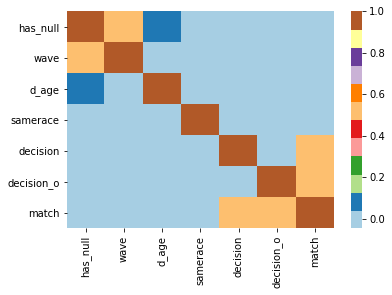

In [8]:
#I evaluate if the columns in this dataset are strongly correlated

corr = dating.corr()
sns.heatmap(corr, cmap="Paired")

In [9]:
# I look at the names of columns
dating.columns.values

array(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace', 'importance_same_race',
       'importance_same_religion', 'd_importance_same_race',
       'd_importance_same_religion', 'field', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious',
       'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'attractive_important',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'shared_interests_important',
       'd_attractive_important', 'd_sincere_important',
       'd_intellicence_impor

In [10]:
#I drop all columns regarding the expectactions of the person in date
dating.drop(columns = ['expected_happy_with_sd_people', 'expected_num_interested_in_me','expected_num_matches', 
                       'd_expected_happy_with_sd_people','d_expected_num_interested_in_me', 'd_expected_num_matches'], inplace = True)

In [11]:
#I drop the columns about 'decision' as the machine will naturally base on to consider the prediction of matching
dating.drop(columns = ['decision', 'decision_o'], inplace = True)

In [12]:
#I drop the columns with duplicata and included information on main features (info reg. self rating and the other person's rates, guessing rates)
dating.drop(columns = ['age_o','d_age','field', 'race', 'race_o','tvsports', 'exercise', 'museums','hiking', 'gaming', 'movies', 
                       'concerts', 'shopping', 'yoga', 'sports', 'dining', 'art', 'clubbing', 'reading', 'tv', 'theater', 
                       'music', 'interests_correlate','importance_same_race', 'importance_same_religion', 'pref_o_attractive', 
                       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
                       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 
                       'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 
                       'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 
                       'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 
                       'ambition_partner', 'shared_interests_partner', 'guess_prob_liked', 'like'], inplace = True)

In [13]:
# All columns started with 'd_' are rates classification 
# so I decide de look at those should be identified as not started by 'd_'
no_d_colnames = []
for col in dating.columns:
    if not col.startswith('d_'):
        no_d_colnames.append(col)
print(no_d_colnames)# test a list comprehension

['has_null', 'wave', 'gender', 'age', 'samerace', 'met', 'match']


In [14]:
dating.columns

Index(['has_null', 'wave', 'gender', 'age', 'd_d_age', 'samerace',
       'd_importance_same_race', 'd_importance_same_religion',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important',
       'd_sincere_important', 'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theater', 'd_movies', 'd_concerts', 'd

In [15]:
#I harmonize the values of the series with inverted commas and uppercase letter
#dating['field'] = dating['field'].str.replace("'", "").str.lower()

In [16]:
#I consider that information regarding the other is not relevant in the dataset
dating.drop(columns = ['d_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'd_tvsports', 'd_exercise', 'd_museums',
       'd_hiking', 'd_gaming', 'd_theater', 'd_movies', 'd_concerts', 'd_shopping',
       'd_yoga', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition', 'd_guess_prob_liked'], inplace = True)

In [17]:
#I identify the '?' values number by feature
dating.eq('?').sum()

C:\Users\Paul\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


has_null                          0
wave                              0
gender                            0
age                              95
d_d_age                           0
samerace                          0
d_importance_same_race            0
d_importance_same_religion        0
d_attractive_important            0
d_sincere_important               0
d_intellicence_important          0
d_funny_important                 0
d_ambtition_important             0
d_shared_interests_important      0
d_attractive_partner              0
d_sincere_partner                 0
d_intelligence_partner            0
d_funny_partner                   0
d_ambition_partner                0
d_shared_interests_partner        0
d_sports                          0
d_dining                          0
d_art                             0
d_clubbing                        0
d_reading                         0
d_tv                              0
d_music                           0
d_interests_correlate       

In [18]:
# I drop the rows with the '?' values 
dating.drop(dating.index[dating['age']== '?'], inplace = True)  # dating = dating[dating.age != '?']
dating.drop(dating.index[dating['met']== '?'], inplace = True)

In [19]:
# I rename some columns names
dating.rename(columns={'d_intellicence_important':'d_intelligence_important', 'd_ambtition_important': 'd_ambition_important', 'met':'already_met'},inplace=True)

In [20]:
#I explore again the dataset after those changes
dating.shape

(7921, 31)

In [21]:
dating.head() #dating.columns ou affichage columns in a whole

,has_null,wave,gender,age,d_d_age,samerace,d_importance_same_race,d_importance_same_religion,d_attractive_important,d_sincere_important,...,d_dining,d_art,d_clubbing,d_reading,d_tv,d_music,d_interests_correlate,d_like,already_met,match
0,0,1,female,21,[4-6],0,[2-5],[2-5],[0-15],[16-20],...,[9-10],[0-5],[0-5],[6-8],[9-10],[9-10],[0-0.33],[6-8],0,0
1,0,1,female,21,[0-1],0,[2-5],[2-5],[0-15],[16-20],...,[9-10],[0-5],[0-5],[6-8],[9-10],[9-10],[0.33-1],[6-8],1,0
2,1,1,female,21,[0-1],1,[2-5],[2-5],[0-15],[16-20],...,[9-10],[0-5],[0-5],[6-8],[9-10],[9-10],[0-0.33],[6-8],1,1
3,0,1,female,21,[2-3],0,[2-5],[2-5],[0-15],[16-20],...,[9-10],[0-5],[0-5],[6-8],[9-10],[9-10],[0.33-1],[6-8],0,1
4,0,1,female,21,[2-3],0,[2-5],[2-5],[0-15],[16-20],...,[9-10],[0-5],[0-5],[6-8],[9-10],[9-10],[0-0.33],[6-8],0,1


In [22]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 8377
Data columns (total 31 columns):
has_null                        7921 non-null int64
wave                            7921 non-null int64
gender                          7921 non-null object
age                             7921 non-null object
d_d_age                         7921 non-null object
samerace                        7921 non-null int64
d_importance_same_race          7921 non-null object
d_importance_same_religion      7921 non-null object
d_attractive_important          7921 non-null object
d_sincere_important             7921 non-null object
d_intelligence_important        7921 non-null object
d_funny_important               7921 non-null object
d_ambition_important            7921 non-null object
d_shared_interests_important    7921 non-null object
d_attractive_partner            7921 non-null object
d_sincere_partner               7921 non-null object
d_intelligence_partner          7921 non-null ob

In [23]:
dating.d_interests_correlate.value_counts()

[0-0.33]    2916
[0.33-1]    2783
[-1-0]      2222
Name: d_interests_correlate, dtype: int64

In [24]:
dating.d_d_age.value_counts()

[2-3]     2301
[4-6]     2210
[0-1]     2137
[7-37]    1273
Name: d_d_age, dtype: int64

In [25]:
dating.d_like.value_counts()

[6-8]     4682
[0-5]     2655
[9-10]     584
Name: d_like, dtype: int64

In [26]:
dating.d_attractive_partner.value_counts()

[6-8]     4388
[0-5]     2692
[9-10]     841
Name: d_attractive_partner, dtype: int64

In [27]:
dating.d_funny_partner.value_counts()

[6-8]     4513
[0-5]     2459
[9-10]     949
Name: d_funny_partner, dtype: int64

In [28]:
dating['age']=pd.to_numeric(dating['age'])
dating.age.dtypes

dtype('int64')

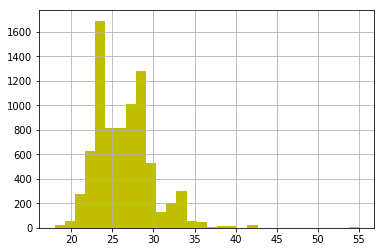

In [29]:
dating['age'].hist(bins=30, color = 'y')

In [30]:
dating['already_met']=pd.to_numeric(dating['already_met'])
dating.already_met.dtypes

dtype('int64')

In [31]:
# I decide to label values in order to normalize the ranking values, convert to integer, on a scale of 10

In [32]:
age_scale = {'[0-1]': int(0), '[2-3]': int(2), '[4-6]': int(5), '[7-37]': 7} #d_d_age column

In [33]:
importance = {'[0-1]': int(0), '[2-5]': int(5), '[6-10]': int(10)} #d_importance_same_race, d_importance_same_religion
dating['d_importance_same_race'] = dating['d_importance_same_race'].map(importance)
dating['d_importance_same_religion'] = dating['d_importance_same_religion'].map(importance)

In [34]:
rate = {'[0-5]': 3, '[6-8]' : 7, '[9-10]': 10}
rating_cols = ['d_like', 'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'd_sports', 'd_dining', 'd_art', 'd_clubbing', 'd_reading', 'd_tv', 'd_music']
for col in rating_cols:
        dating[col] = dating[col].map(rate)

In [35]:
criteria ={'[0-15]':0, '[16-20]': 2, '[21-100]': 8}       
crit_cols = ['d_attractive_important', 'd_sincere_important', 'd_intelligence_important', 'd_funny_important', 'd_ambition_important', 'd_shared_interests_important']
for col in crit_cols:
        dating[col] = dating[col].map(criteria)

In [36]:
correlate ={'[-1-0]':int(0), '[0-0.33]':int(3), '[0.33-1]':int(8)} #d_interests_correlate
dating['d_interests_correlate'] = dating['d_interests_correlate'].map(correlate)   

In [37]:
dating.dtypes

has_null                         int64
wave                             int64
gender                          object
age                              int64
d_d_age                         object
samerace                         int64
d_importance_same_race           int64
d_importance_same_religion       int64
d_attractive_important           int64
d_sincere_important              int64
d_intelligence_important         int64
d_funny_important                int64
d_ambition_important             int64
d_shared_interests_important     int64
d_attractive_partner             int64
d_sincere_partner                int64
d_intelligence_partner           int64
d_funny_partner                  int64
d_ambition_partner               int64
d_shared_interests_partner       int64
d_sports                         int64
d_dining                         int64
d_art                            int64
d_clubbing                       int64
d_reading                        int64
d_tv                     

In [38]:
x_columns = [col for col in dating.columns.values if col != "match"]
dating_variables = dating[x_columns]
dating_y = dating["match"]#target

In [78]:
dating_x = pd.get_dummies(data=dating_variables, columns=['gender', 'd_d_age'], drop_first= True)
dating_x.head()

,has_null,wave,age,samerace,d_importance_same_race,d_importance_same_religion,d_attractive_important,d_sincere_important,d_intelligence_important,d_funny_important,...,d_reading,d_tv,d_music,d_interests_correlate,d_like,already_met,gender_male,d_d_age_[2-3],d_d_age_[4-6],d_d_age_[7-37]
0,0,1,21,0,5,5,0,2,2,0,...,7,10,10,3,7,0,0,0,1,0
1,0,1,21,0,5,5,0,2,2,0,...,7,10,10,8,7,1,0,0,0,0
2,1,1,21,1,5,5,0,2,2,0,...,7,10,10,3,7,1,0,0,0,0
3,0,1,21,0,5,5,0,2,2,0,...,7,10,10,8,7,0,0,1,0,0
4,0,1,21,0,5,5,0,2,2,0,...,7,10,10,3,7,0,0,1,0,0


In [79]:
dating_x.gender_male.value_counts()

1    3974
0    3947
Name: gender_male, dtype: int64

# 2. Performing Supervised Learning on the Dataset¶

In [40]:
# On the target feature, there are two classes (match or not)

In [41]:
# Correlate the features that seem naturally influence the match decision : 
# age difference, correlate interests, rates of attractiveness, fun and like

In [42]:
# verify the correlation
# test on different model if it is confirmed

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dating_x, dating_y, test_size=0.2)

In [44]:
#The logistic regression is the appropriate model to fit naturally

from sklearn.linear_model import LogisticRegression

dating_log = LogisticRegression().fit(X_train, y_train)

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
dating_log.fit(dating_x, dating_y)

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
dating_log.intercept_

array([-3.77472371])

In [123]:
columns = dating.drop("match",axis=1).columns.tolist()


for col, coef_ in zip(columns, dating_log.coef_[0]):
    print(col, coef_)

has_null 0.010741243314502252
wave 0.002888871875724701
gender -0.03454161029915961
age -0.012970415617770592
d_d_age -0.034875908607003514
samerace 0.0077310332831191835
d_importance_same_race -0.02042583373451833
d_importance_same_religion -0.053112489053946825
d_attractive_important 0.039727419937796514
d_sincere_important 0.0087912183109914
d_intelligence_important -0.01256089683157551
d_funny_important -0.03272750878691934
d_ambition_important 0.10979011068198066
d_shared_interests_important -0.005300470167001824
d_attractive_partner 0.02506050922747711
d_sincere_partner 0.1389733699395986
d_intelligence_partner -0.0556454006231962
d_funny_partner 0.09977297293745942
d_ambition_partner 0.004249637469636309
d_shared_interests_partner -0.018041313624919352
d_sports 0.028887406987251465
d_dining 0.04179196176067434
d_art -0.024956541191704824
d_clubbing -0.03138306763732233
d_reading 0.003659354919978409
d_tv 0.009453022838881133
d_music 0.21942753352840214
d_interests_correlate 0.33

In [122]:
dating_log.coef_

array([[ 0.01074124,  0.00288887, -0.03454161, -0.01297042, -0.03487591,
         0.00773103, -0.02042583, -0.05311249,  0.03972742,  0.00879122,
        -0.0125609 , -0.03272751,  0.10979011, -0.00530047,  0.02506051,
         0.13897337, -0.0556454 ,  0.09977297,  0.00424964, -0.01804131,
         0.02888741,  0.04179196, -0.02495654, -0.03138307,  0.00365935,
         0.00945302,  0.21942753,  0.33235858, -0.12891965, -0.05369098,
        -0.18685684, -0.357283  ]])

In [82]:
#score returns the coefficient of determination or r squared. 
#This number tells us what proportion of the variation in the data is explained by the model
score = dating_log.score(dating_x, dating_y)
print('Our model predicts the variation in the data at', (score)*100, '%')

Our model predicts the variation in the data at 83.01982072970584 %


# Testing & obtaining quality metrics

In [49]:
from sklearn import metrics

In [50]:
from sklearn.metrics import confusion_matrix

y_pred_test = dating_log.predict(X_test)
confusion_matrix(y_test, y_pred_test) # display a heatmap with seaborn

array([[1294,   35],
       [ 238,   18]], dtype=int64)

In [51]:
#The first entry in our matrix is the number of observations correctly classified as 0 (or failure). 
#The second entry in the matrix are all entries incorrectly classified as 1 (or success). 
#These observations are actually zeros but our algorithm classified them as 1. 
#The third entry contains the count of all observations incorrectly classified as zero (or failure). 
#The last entry contains the count of observations correctly classified as 1. 
#Our goal is to maximize the first and last entries (the correctly classified observations) and minimize the incorrectly classified information. 
#As we can see, out of 1585 observations, 1329 (or 83,8%) are correctly classified.

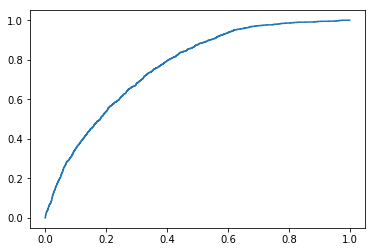

In [52]:
y_pred_proba = dating_log.predict_proba(dating_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(dating_y,  y_pred_proba)
auc = metrics.roc_auc_score(dating_y, y_pred_proba)
plt.plot(fpr,tpr)

In [53]:
print('The Area Under The Curve is', auc)

The Area Under The Curve is 0.7667895273002715


In [54]:
#We can see that the area under the curve is larger than the x = y diagonal. In fact, we have computed it to be over 0.76

In [55]:
#Accuracy Score: The simplest classification metric simply calculates the ratio of correct to incorrect predictions.
from sklearn.metrics import accuracy_score

y_pred_test = dating_log.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
print('The model accurary score is', score)

The model accurary score is 0.8277602523659306


In [113]:
#The random forest classifier is one other model to try

from sklearn.ensemble import RandomForestClassifier

# Init
dating_rf = RandomForestClassifier()

# On entraine
dating_rf = dating_rf.fit(X_train, y_train)

# On prédit sur le train
y_pred_train = dating_rf.predict(X_train)
# On regarde les métriques sur le train
print("Stats sur le train")
print(precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

print(confusion_matrix(y_train, y_pred_train))
# On prédit sur le test
y_pred_test = dating_rf.predict(X_test)
# On regarde les métriques sur le test
print("Stats sur le test")
print(precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))
confusion_matrix(y_test, y_pred_test)

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Stats sur le train
(array([0.97201112, 0.98087141]), array([0.99657925, 0.8594041 ]), array([0.98414188, 0.91612903]), array([5262, 1074], dtype=int64))
[[5244   18]
 [ 151  923]]
Stats sur le test
(array([0.86054422, 0.44347826]), array([0.95184349, 0.19921875]), array([0.90389425, 0.27493261]), array([1329,  256], dtype=int64))


array([[1265,   64],
       [ 205,   51]], dtype=int64)

In [57]:
y_pred_test_rf = dating_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

array([[1270,   59],
       [ 211,   45]], dtype=int64)

In [58]:
#As we can see, out of 1585 observations, 1310 (or 82,6 %) are correctly classified.

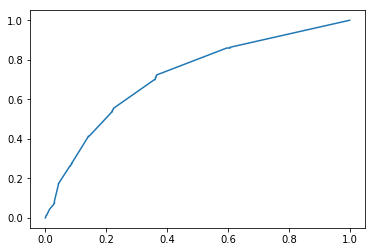

In [59]:
y_pred_proba_rf = dating_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr,tpr)

In [60]:
print('The Area Under The Curve is', auc)

The Area Under The Curve is 0.7181386380737396


In [61]:
#We can see that the area under the curve is larger than the x = y diagonal. In fact, we have computed it to be over 0.69. 
#The log regression model obtained more qualitative metrics.

In [107]:
from sklearn.neighbors import KNeighborsClassifier

neighbor_model = KNeighborsClassifier(n_neighbors=5) 
neighbor_model.fit(dating_x, dating_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [108]:
pred_ = neighbor_model.predict(dating_x)

precision_recall_fscore_support(dating_y, pred_, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None)

(array([0.88718876, 0.70901639]),
 array([0.9676832 , 0.39022556]),
 array([0.9256894 , 0.50339476]),
 array([6591, 1330], dtype=int64))

In [63]:
#obs = np.array([[0.5, 0.3, 0.05, 0.6, 0.2, 0.1, 0.1, 8]])
#print(neighbor_model.predict(obs))

# 3. Deploying the model on the train set

In [90]:
dating_log.fit(X_train, y_train)

print("Model performance on training set: {}".format(dating_log.score(X_train, y_train)))
print("Model performance on testing set: {}".format(dating_log.score(X_test, y_test)))


C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model performance on training set: 0.8306502525252525
Model performance on testing set: 0.828391167192429


Evaluating Classification Model

In [91]:
y_pred = dating_log.predict(X_test)

y_pred_train = dating_log.predict(X_train)

In [92]:
from sklearn.metrics import r2_score

score = r2_score(y_train, y_pred_train)
print('The model R-squared score is', score)

The model R-squared score is -0.2029837625730171


In [99]:
confusion_matrix(y_train, y_pred_train) # display a heatmap with seaborn

array([[5139,  123],
       [ 950,  124]], dtype=int64)

In [100]:
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None)

(array([0.84398095, 0.50202429]),
 array([0.97662486, 0.11545624]),
 array([0.90547088, 0.18773656]),
 array([5262, 1074], dtype=int64))

In [94]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_train, y_pred_train)
print('The model accurary score is', score)

The model accurary score is 0.8306502525252525


In [95]:
from sklearn.metrics import balanced_accuracy_score

score = balanced_accuracy_score(y_train, y_pred_train)
print('The model balanced accurary score is', score)

The model balanced accurary score is 0.5460405479149547


In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1_score = f1_score(y_train, y_pred_train)
print('The model precision score is', precision)
print('The model recall score is', recall)
print('The model f1 score is', f1_score)

The model precision score is 0.5020242914979757
The model recall score is 0.1154562383612663
The model f1 score is 0.18773656320968965


In [70]:
#from sklearn.metrics import roc_curve, roc_auc_score

#fpr, tpr, thresholds = roc_curve(y, scores)
#roc_auc_score(y_true, y_scores)

In [71]:
#Interprete the metrics precision, recall, f1 scores